In [42]:
#import packages
import pandas as pd
%load_ext rpy2.ipython
%R library(ggplot2)
%R library(scales)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['scales', 'ggplot2', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [43]:
#read in two years of seperate csv
t1 = pd.read_csv('2019_count.csv')
t2 = pd.read_csv('2018_count.csv')

In [44]:
t1['year'] = 2019
t2['year'] = 2018

In [45]:
t1 = t1.drop('Unnamed: 0', axis = 1)
t2 = t2.drop('Unnamed: 0', axis = 1)

In [46]:
t1.head()

,label,position,year
0,0,833,2019
1,1,617,2019
2,2,1651,2019
3,3,188,2019


In [47]:
t2.head()

,label,position,year
0,0,1444,2018
1,1,218,2018
2,2,1079,2018
3,3,464,2018


In [48]:
t = pd.merge(t1, t2, on = 'label', how = 'inner')
t.loc[t.label == 0,'label'] = 'Data Scientist'
t.loc[t.label == 1, 'label'] = 'Data Engineer'
t.loc[t.label == 2, 'label'] = 'Data Analyst'
t.loc[t.label == 3, 'label'] = 'Machine Learning Engineer'

In [49]:
%R -i t

In [50]:
t

,label,position_x,year_x,position_y,year_y
0,Data Scientist,833,2019,1444,2018
1,Data Engineer,617,2019,218,2018
2,Data Analyst,1651,2019,1079,2018
3,Machine Learning Engineer,188,2019,464,2018


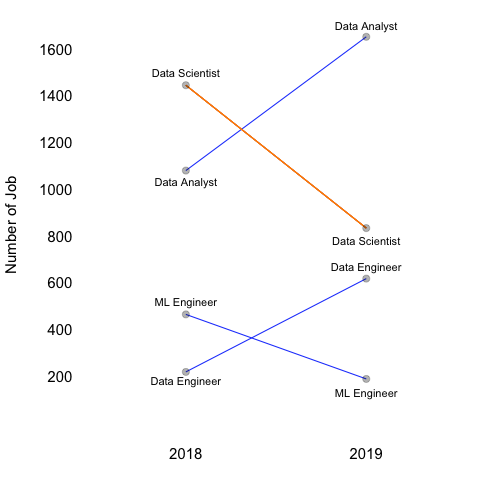

In [51]:
%%R

ggplot() + geom_segment(aes(x = year_y, xend= year_x, y=position_y, yend=position_x, group = label), colour = '#244AFC',data = t) +
geom_segment(aes(x = 2018, xend = 2019, y=1444, yend=833),colour = 'darkorange', data = t) +
geom_point(aes(x = year_y, y = position_y), data = t, fill = 'grey', alpha = .3, size = 3) +
geom_point(aes(x = 2019, y = position_x), data = t, fill = 'grey', alpha = .3, size = 3) +
annotate('text', x = 2018, y = 1500, label = 'Data Scientist') +
annotate('text', x = 2019, y = 780, label = 'Data Scientist') +
annotate('text', x = 2018, y = 1030, label = 'Data Analyst') +
annotate('text', x = 2019, y = 1700, label = 'Data Analyst') +
annotate('text', x = 2018, y = 180, label = 'Data Engineer') +
annotate('text', x = 2019, y = 670, label = 'Data Engineer') +
annotate('text', x = 2018, y = 520, label = 'ML Engineer') +
annotate('text', x = 2019, y = 130, label = 'ML Engineer') +
xlab('') +
ylab('Number of Job') +
scale_x_discrete(limits = c(2018, 2019), breaks = seq(2018, 2019, by = .5)) +
scale_y_continuous(limits = c(0, 1700), breaks = seq(200, 1600, by = 200)) +
theme(panel.grid.minor = element_blank(), panel.grid.major = element_blank(), panel.background = element_blank(),
     axis.ticks = element_blank(), axis.text.x = element_text(colour = 'black', size = 15), legend.position = 'none', 
      axis.text.y = element_text(colour = 'black', size = 15), axis.title.y = element_text(size = 15, margin = margin(t = 0, r = 20, b = 0, l = 0)))
#ggsave('slope.png', width = 7, height = 5)